In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import stats

In [2]:
with open("J0Jt.dat", "r") as fin:
    r = fin.readlines()
r = r[3:]
p = int(r[0].split()[1])
r = r[p+1:]                           
nall  = int(len(r)/p)

In [3]:
hcf_matrix = np.zeros((p, nall))
for i in range(nall):
    for j in range(p):
        line = r[i*(p+1)+j+1]
        line = line.split()
        hcf_x = float(line[-3])
        hcf_y = float(line[-2])
        hcf_z = float(line[-1])
        hcf_xyz = 1/3*(hcf_x + hcf_y + hcf_z)
        hcf_matrix[j, i] = hcf_xyz
hcf_average = np.mean(hcf_matrix, axis=1)

In [4]:
dt = 100
Ns = 10
cut = 20/30
scale = 4.36139482179546e-05 # Use the 'scale' from simulation log
t = np.arange(1,p+1)*Ns*dt*1e-3

rtc = scale*integrate.cumtrapz(hcf_matrix, axis =0, initial=0)
rtc_average = np.mean(rtc, axis=1)
hcf_matrix_normalized = hcf_matrix / hcf_matrix[0]
hcf_normalized = hcf_average / hcf_average[0]

kappa_product   = np.mean(rtc_average[int(cut*p + 1):])
kappa_coverged  = np.mean(rtc[int(cut*p + 1):], axis = 0)
kappa_error     = np.std(kappa_coverged)/np.sqrt(nall)
error_stat      = np.std(kappa_coverged)/kappa_product

print(r"Thermal conductivity = %s W/mK ± %s" %(kappa_product, kappa_error))
print(r"RRMSE = %s%%" %(error_stat*100))

Thermal conductivity = 226.72527515732057 W/mK ± 10.36679811435643
RRMSE = 24.62315519492182%


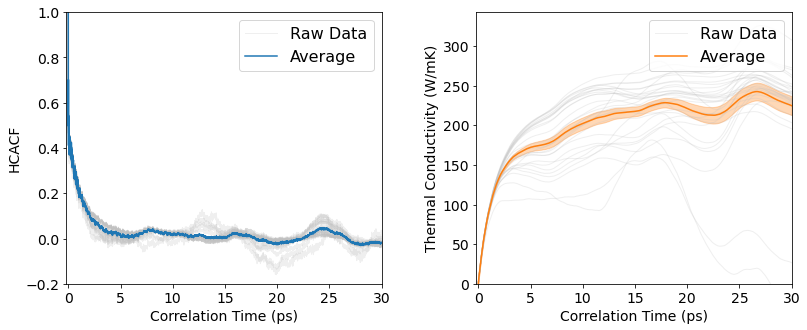

In [5]:
plt.figure(figsize=(13,5))

# Heat Current Autocorrelation Function
plt.subplot(1, 2, 1)
for i in range(hcf_matrix.shape[1]):
    if i == 1:
        plt.plot(t/1000, hcf_matrix_normalized[:,i], linewidth = 1, color="silver", alpha = 0.25, label='Raw Data')
    else:
        plt.plot(t/1000, hcf_matrix_normalized[:,i], linewidth = 1, color="silver", alpha = 0.25)
plt.plot(t/1000, hcf_normalized, linewidth = 1.5, color="C0", label='Average')
plt.legend(fontsize=16,loc=1)
plt.xticks(fontsize = 14)
plt.xlabel('Correlation Time (ps)', fontsize = 14)
plt.ylim(-0.2,1)
plt.xlim(-0.2,30)
plt.yticks(fontsize = 14)
plt.ylabel('HCACF', fontsize = 14)

# Running Thermal Conductivity
plt.subplot(1, 2, 2)
for i in range(rtc.shape[1]):
    if i == 1:
        plt.plot(t/1000, rtc[:,i], linewidth = 1, color="silver", alpha = 0.25, label='Raw Data')
    else:
        plt.plot(t/1000, rtc[:,i], linewidth = 1, color="silver", alpha = 0.25)
plt.plot(t/1000, rtc_average, linewidth = 1.5, color="C1", label='Average')
plt.legend(fontsize=16,loc=1)
rtc_sem = (np.std(rtc,ddof = 1, axis = 1)/np.sqrt(nall))
plt.fill_between(t/1000, rtc_average-rtc_sem, rtc_average+rtc_sem, color="C1", alpha = 0.3)
plt.xticks(fontsize = 14)
plt.xlim(-0.2,30)
plt.ylim(0)
plt.xlabel('Correlation Time (ps)', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Thermal Conductivity (W/mK)', fontsize = 14)
plt.subplots_adjust(wspace=0.3)

The original code was written by Benward (hityingph@163.com)
[See more](https://zhuanlan.zhihu.com/p/391385899)